# Cmpe 548 Monte Carlo Methods Assignment 2

**Alper Ahmetoğlu 2012400147**

### 1. Importance Sampling (unfinished)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

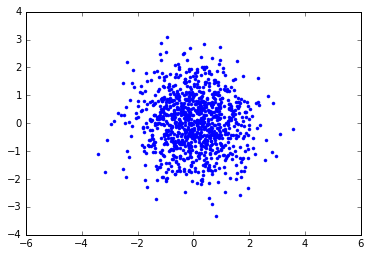

In [3]:
N = 1000
p = 0.5

def pnorm(x,y,p):
    if np.power((np.power(np.absolute(x),p) + np.power(np.absolute(y),p)),1/p) <= 1:
        return (x,y)

r1 = np.random.randn(N)
r2 = np.random.randn(N)

v_pnorm = np.vectorize(pnorm)

a = v_pnorm(r1,r2,1)

#a = pnorm(r1,r2,p)

plt.plot(r1,r2,'.b')
plt.axis('equal');

### 2. Markov Chains

In [4]:
# Transition matrix

A = [[0.25, 0,    0,    0,    0,    0.25],
     [0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
     [0.25, 0.25, 0,    0.5,  0.25, 0.25],
     [0,    0,    0.5,  0,    0,    0   ],
     [0,    0.25, 0,    0,    0.25, 0   ],
     [0.25, 0.25, 0.25, 0.25, 0.25, 0.25]]

In [5]:
# Eigenvector corresponding to lambda_1 = 1
v_1 = np.transpose(np.linalg.eig(A)[1])[0]
v_1 = v_1 / sum(v_1)
print(v_1)

[ 0.08333333  0.25        0.22222222  0.11111111  0.08333333  0.25      ]


***Detailed Balance Condition***

This process does not satify *detailed balance conditon* since $T(x \mid x')\, \pi (x') = T(x' \mid x)\, \pi (x)$ condition does not hold. Some state transitions have one direction. For example there is a state transition from state 1 to state 3 but the opposite does not exist.

array([ 0.08333333,  0.25      ,  0.22222222,  0.11111111,  0.08333333,
        0.25      ])

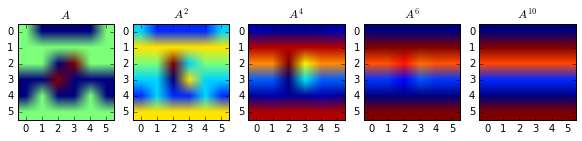

In [31]:
# Initial configuration
X_0 = [1,0,0,0,0,0]

A_2 = np.linalg.matrix_power(A,2)         # A_2  = A^2
A_4 = np.linalg.matrix_power(A,4)         # A_4  = A^4
A_6 = np.linalg.matrix_power(A,6)         # A_6  = A^6
A_10 = np.linalg.matrix_power(A,50)        # A_10 = A^10

fig = plt.figure(figsize=(10,5))

a=fig.add_subplot(1,5,1)
plt.title(r'$A$')
plt.imshow(A)

a=fig.add_subplot(1,5,2)
plt.title(r'$A^2$')
plt.imshow(A_2);

a=fig.add_subplot(1,5,3)
plt.title(r'$A^4$')
plt.imshow(A_4);

a=fig.add_subplot(1,5,4)
plt.title(r'$A^6$')
plt.imshow(A_6);

a=fig.add_subplot(1,5,5)
plt.title(r'$A^{10}$')
plt.imshow(A_10);

np.matmul(A_10, X_0)

As we have seen above, even after 10 iterations transition kernel $K$ reaches the stationary distribution.

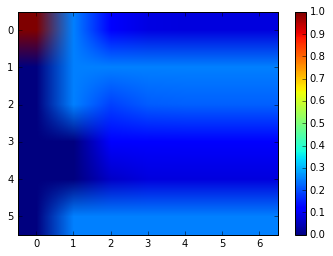

In [32]:
pi_1 = np.matmul(A, X_0)
pi_2 = np.matmul(A_2, X_0)
pi_4 = np.matmul(A_4, X_0)
pi_6 = np.matmul(A_6, X_0)
pi_10 = np.matmul(A_10, X_0)

pi_over_t = [np.array(X_0), pi_1, pi_2, pi_4, pi_6, pi_10, v_1]

plt.imshow(np.transpose(pi_over_t));
plt.colorbar();

### Simulating Chain

In [98]:
size = 10000
M = 15
state = 0
B = np.transpose(A) ## for convenience (B[0] == die's top face is 1)
p = [0,0,0,0,0,0]

for y in range(size):
    for i in range(M):
        temp_cdf_value = 0
        rn = np.random.rand(1)
        for j in range(6):
            temp_cdf_value += B[state][j]
            if temp_cdf_value > rn:
                state = j
                break
    p[state] += 1


[811, 2496, 2280, 1127, 841, 2445]

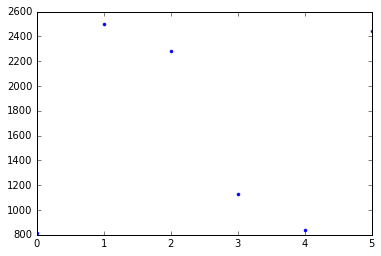

In [99]:
plt.plot(p,'.')
p